In [1]:
import sys
sys.path.append('..')

In [4]:
from database import TextFiles
from analytics import create_article_df, groupby_newspaper

db = TextFiles('final')
articles = db.get_all_articles()

In [5]:
df = create_article_df(articles)
print(df.dtypes)

df.head()

newspaper_id                   object
body                           object
headline                       object
article_url                    object
article_id                     object
date_published    datetime64[ns, UTC]
date_modified                  object
date_uploaded                  object
newspaper                      object
newspaper_url                  object
dtype: object


,newspaper_id,body,headline,article_url,article_id,date_published,date_modified,date_uploaded,newspaper,newspaper_url
0,nzherald,Preparing New Zealand's water stores for a wa...,Preparing New Zealand for climate change,https://www.nzherald.co.nz/nz/news/article.cfm...,11800198,2017-02-13 19:50:05+00:00,2017-07-20T12:00:42.990Z,2020-07-09T23:13:59.445154,The New Zealand Herald,nzherald.co.nz
1,nzherald,LONDON - The global warming danger threshold ...,Planet a decade from global warming point of n...,https://www.nzherald.co.nz/world/news/article....,10007899,2005-01-24 19:35:21+00:00,2017-11-23T05:49:23.038Z,2020-07-09T23:17:57.984039,The New Zealand Herald,nzherald.co.nz
2,nzherald,There are no new cases of Covid-19 in New Zea...,Another zero day - no new cases of Covid-19,https://www.nzherald.co.nz/nz/news/article.cfm...,12344572,2020-07-01 01:27:05+00:00,2020-07-01T02:03:23.768Z,2020-07-09T23:15:15.800920,The New Zealand Herald,nzherald.co.nz
3,nzherald,New Zealand's agribusiness sector has excitin...,Fenwick Forum leaders propose agri industry tr...,https://www.nzherald.co.nz/business/news/artic...,12343034,2020-06-30 16:59:08+00:00,2020-06-30T03:48:36.116Z,2020-07-09T23:14:50.000862,The New Zealand Herald,nzherald.co.nz
4,nzherald,A Connecticut lawmaker wants to strike climat...,Growing call for climate change 'alternatives'...,https://www.nzherald.co.nz/world/news/article....,12210364,2019-03-06 21:30:15+00:00,2019-03-06T21:53:30.642Z,2020-07-09T23:12:53.149466,The New Zealand Herald,nzherald.co.nz


In [9]:
years = df.groupby(df.loc[:, 'date_published'].dt.year).count()
years

,newspaper_id,body,headline,article_url,article_id,date_published,date_modified,date_uploaded,newspaper,newspaper_url,article-length
date_published,,,,,,,,,,,
1970.0,20,20,20,20,20,20,20,20,20,20,20
1997.0,1,1,1,1,1,1,1,1,1,1,1
1999.0,1,1,1,1,1,1,1,1,1,1,1
2000.0,1,1,1,1,1,1,1,1,1,1,1
2001.0,4,4,4,4,4,4,4,4,4,4,4
2002.0,1,1,1,1,1,1,1,1,1,1,1
2005.0,4,4,4,4,4,4,4,4,4,4,4
2006.0,4,4,4,4,4,4,4,4,4,4,4
2007.0,7,7,7,7,7,7,7,7,7,7,7


<BarContainer object of 22 artists>

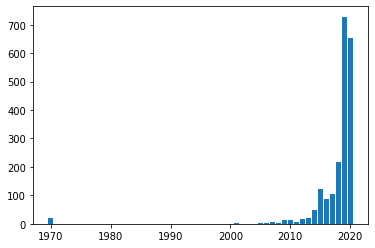

In [12]:
!pip install matplotlib -Uq
import matplotlib.pyplot as plt

f, axes = plt.subplots()

axes.bar(x=years.index, height=years.loc[:, 'newspaper'])

In [13]:
lens = groupby_newspaper(df)

In [14]:
lens

,newspaper_id,average_article_length,article_count
0,guardian,955.641646,413
1,nytimes,1250.944444,342
2,nzherald,794.207668,313
3,fox,631.696078,306
4,stuff,747.968310,284
5,newshub,441.752066,242
6,skyau,123.926316,190


In [15]:
lens.to_dict(orient='records')

[{'newspaper_id': 'guardian',
  'average_article_length': 955.6416464891041,
  'article_count': 413},
 {'newspaper_id': 'nytimes',
  'average_article_length': 1250.9444444444443,
  'article_count': 342},
 {'newspaper_id': 'nzherald',
  'average_article_length': 794.2076677316294,
  'article_count': 313},
 {'newspaper_id': 'fox',
  'average_article_length': 631.6960784313726,
  'article_count': 306},
 {'newspaper_id': 'stuff',
  'average_article_length': 747.9683098591549,
  'article_count': 284},
 {'newspaper_id': 'newshub',
  'average_article_length': 441.75206611570246,
  'article_count': 242},
 {'newspaper_id': 'skyau',
  'average_article_length': 123.92631578947369,
  'article_count': 190}]